In [1]:
!pip install -Uq lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
import lightning as L


import os


import torchvision
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset,random_split,DataLoader
from torchvision import datasets



In [10]:
train_data = datasets.MNIST(root='data',train=True, download=True, transform=torchvision.transforms.ToTensor(),)

100%|██████████| 9912422/9912422 [00:00<00:00, 101508901.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29000644.92it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28717020.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6045867.59it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [13]:
np.shape(train_data.data)

torch.Size([60000, 28, 28])

In [14]:
test_data = datasets.MNIST(root='data',train=False, download=True, transform=torchvision.transforms.ToTensor())

In [18]:
train_data, val_data = random_split(train_data, [55000,5000])

In [29]:
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

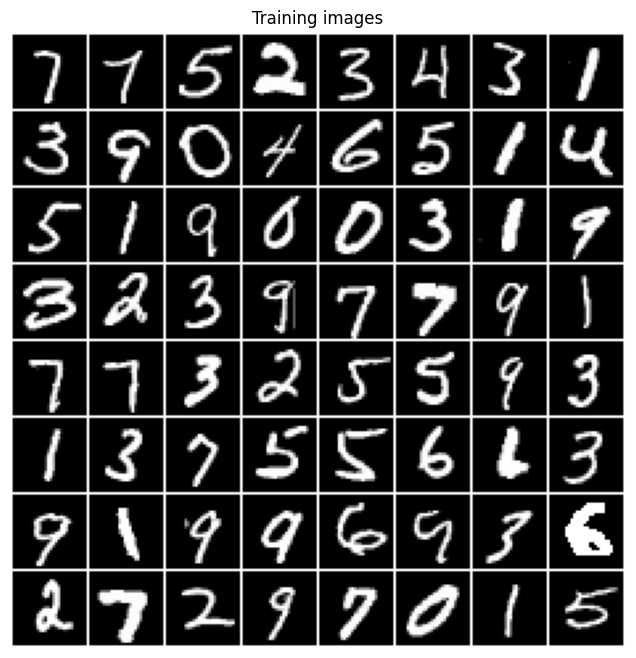

In [40]:
for images, labels in train_loader:
  break

plt.figure(figsize= (8,8))
plt.axis('off')
plt.title('Training images')
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=1,
    pad_value=3,
    normalize=False),
    (1,2,0)
))

In [23]:
# If we do the same using pytorch lightning
# It becomes very convenient

class MnistDataModule(L.LightningDataModule):
  def __init__(self, data_path:str="./", batch_size = 64, num_workers=0):
    super().__init__()
    self.data_path = data_path,
    self.batch_size = batch_size,
    self.num_workers = num_workers

  def prepare_data(self):
    datasets.MNIST(root = str(self.data_path),download=True)

  def setup(self, stage=None):
    train = datasets.MNIST(
        root=  str(self.data_path),
        train= True,
        transform = torchvision.transforms.ToTensor(),
        download = False
    )

    test = datasets.MNIST(
        root = str(self.data_path),
        train = False,
        transform = torchvision.transforms.ToTensor(),
        download = False,
    )

    self.train, self.val = random_split(train, lengths=[55000,5000])

    def train_loader(self):
      return DataLoader(dataset=self.train, batch_size = self.batch_size, drop_last=True,shuffle=True,num_workers=self.num_workers)

    def val_loader(self):
      return DataLoader(dataset = self.val, batch_size = self.batch_size, drop_last=False, shuffle=False, num_workers=self.num_workers)

    def test_loader(self):
      return DataLoader(dataset = self.test, batch_size = self.batch_size, drop_last=False, shuffle=False, num_workers=self.num_workers)



In [25]:
# Now setup and prepare the data in one step

L.pytorch.seed_everything(334)

dm = MnistDataModule()
dm.prepare_data()
dm.setup()

INFO: Global seed set to 334
INFO:lightning.fabric.utilities.seed:Global seed set to 334


'/content'